In [1]:
# 2nd Run : Score of 0.1441
import pandas as pd
import psutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
from math import ceil
from math import sqrt
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.model_selection import GridSearchCV
import statistics
import sklearn.model_selection as ms
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train3.csv')
test = pd.read_csv('test3.csv', index_col = 0)

In [4]:
X = pd.DataFrame(train.iloc[:,:-1])
X = pd.DataFrame(train.iloc[:,1:])
X.head()
y = (train.iloc[:,-1])
y.head()
# settings
#nJobs = psutil.cpu_count()
kFold = 10
X = X.drop(['ylogSalePrice'], axis =1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,6.831328,20.212182,7,5,15.187527,15.187527,9.059126,12.170327,1.0,...,0,0,0,0,1,0,0,0,1,0
1,20,7.221214,20.712205,6,8,15.145138,15.145138,1.000000,13.062832,1.0,...,0,0,0,0,1,0,0,0,1,0
2,60,6.914940,21.347241,7,5,15.184404,15.185966,8.646538,11.200343,1.0,...,0,0,0,0,1,0,0,0,1,0
3,70,6.684507,20.691553,7,5,15.047529,15.135652,1.000000,9.274266,1.0,...,0,0,0,0,1,0,0,0,0,0
4,60,7.314735,22.325160,8,5,15.182841,15.182841,10.391827,11.971129,1.0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)
stratify_divide = StratifiedKFold(n_splits=10, shuffle=True, random_state=99)
kf = KFold(n_splits = 5, shuffle = True, random_state = 28)
def rmse_cv(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [6]:
rforest = RandomForestRegressor()

rforest.set_params(random_state=52)

# Train the model on training data
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=52, verbose=0, warm_start=False)

In [7]:
print("The train set R^2 is: %.5f" % rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % rforest.score(X_test, y_test))

The train set R^2 is: 0.97664
The test set R^2 is is: 0.83603


In [8]:
# Initial prediction
rforest_pred = rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(rforest_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 17310.74
Mean Squared Error (MSE): 0.023350604503516337
Root Mean Square Error (RMSE): 0.15280904588248806
Mean Absolute Percent Error (MAPE): 10.7 %.


In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [11]:
grid_search_rforest = ms.GridSearchCV(rforest, param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_rforest.fit(X_train, y_train)

CPU times: user 34.4 s, sys: 1.11 s, total: 35.5 s
Wall time: 55min 50s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=52, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [20, 25, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 3, 5], 'n_estimators': [500, 750, 1000, 1250, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
# get the best parameters
grid_search_rforest.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [13]:
# Prediction using the tuned parameters
grid_rforest = grid_search_rforest.best_estimator_

In [14]:
print("The train set R^2 is: %.5f" % grid_rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_rforest.score(X_test, y_test))

The train set R^2 is: 0.98422
The test set R^2 is is: 0.86928


In [15]:
#Prediction with tuned hyperparameters
grid_rforest_pred = grid_rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_rforest_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')


Mean Absolute Error (MAE): $ 15257.03
Mean Squared Error (MSE): 0.018616488906127774
Root Mean Square Error (RMSE): 0.13644225484111502
Mean Absolute Percent Error (MAPE): 9.42 %.


In [16]:
score = rmse_cv(grid_rforest)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.1407 (0.0191)



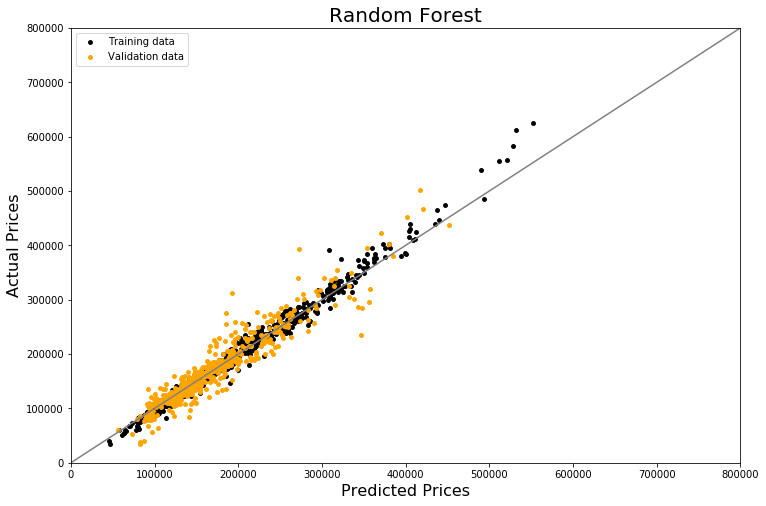

In [17]:
y_train_rForest = grid_rforest.predict(X_train)
y_test_rForest = grid_rforest.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_rForest), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_rForest), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Random Forest", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [18]:
# Random Forest Feature Importance 
# Get numerical feature importances
feats_rf = list(rforest.feature_importances_)

# List of tuples with variable and importance
feats_rf_score = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, feats_rf)]

# Sort the feature importances by most important first
sorted_feats_rf_score = sorted(feats_rf_score, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in sorted_feats_rf_score]

Variable: OverallQual          Importance: 0.51678
Variable: TotalSF              Importance: 0.27308
Variable: GrLivArea            Importance: 0.02058
Variable: LotArea              Importance: 0.01346
Variable: TotalBath            Importance: 0.01311
Variable: BsmtFinSF1           Importance: 0.01148
Variable: CentralAir_Y         Importance: 0.011
Variable: YearRemodAdd         Importance: 0.01065
Variable: YearBuilt            Importance: 0.00876
Variable: BsmtUnfSF            Importance: 0.00856
Variable: GarageArea           Importance: 0.00817
Variable: GarageCars           Importance: 0.00727
Variable: OverallCond          Importance: 0.00698
Variable: LotFrontage          Importance: 0.00574
Variable: GarageYrBlt          Importance: 0.00467
Variable: TotalPorchSF         Importance: 0.00462
Variable: BsmtQual_TA          Importance: 0.00383
Variable: FireplaceQu_No       Importance: 0.00313
Variable: Neighborhood_OldTown Importance: 0.00278
Variable: MoSold               Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Text(0.5, 1.0, 'Feature Importances')

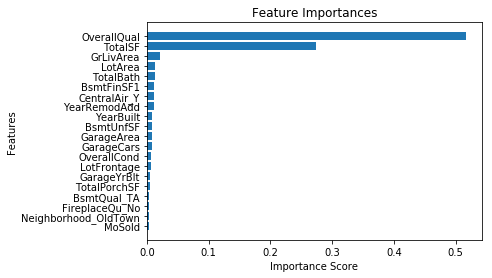

In [19]:
rf_feature_importances_top20 = sorted_feats_rf_score[:20]
featureNames, featureScores = zip(*list(rf_feature_importances_top20))

plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

In [20]:
grid_rforest = grid_search_rforest.best_estimator_
feature_importance = 100.0 * (grid_rforest.feature_importances_ / grid_rforest.feature_importances_.max())
important_features = X_train.columns[feature_importance >= 0]
unimportant_features = X_train.columns[feature_importance < 0]

In [21]:
X_train_reduced = X_train.drop(unimportant_features, axis=1)
X_test_reduced = X_test.drop(unimportant_features, axis=1)

In [22]:
# GridSearchCV for multiple hyperparameters:
rForest_feats = RandomForestRegressor()

param_grid ={'max_depth': [10, 20, 30, 40, 50],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'n_estimators': [100, 300, 500, 800]}

rForest_feats.set_params(random_state=42)

grid_search_rForest2 = GridSearchCV(rForest_feats, param_grid, scoring= 'neg_mean_squared_error',
                           cv= kf, n_jobs = -1, return_train_score=True, verbose = 1)
grid_search_rForest2.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 12.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4], 'n_estimators': [100, 300, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [23]:
# get the best parameters
grid_search_rForest2.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 300}

In [24]:
# Use the forest's predict method on the test data
predictions_tuned_rForest2 = grid_search_rForest2.best_estimator_.predict(X_test_reduced)

# Calculate the absolute errors
errors = abs(np.expm1(predictions_tuned_rForest2) - np.expm1(y_test))

# Print out the mean absolute error (MAE)
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('MSE:', mean_squared_error(y_test, predictions_tuned_rForest2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_tuned_rForest2)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))

# Calculate and display MAPE
#accuracy = 100 - np.mean(mape)
print('MAPE:', round(np.mean(mape), 2), '%.')


Mean Absolute Error (MAE): $ 15287.37
MSE: 0.018895647916756724
RMSE: 0.13746144156364987
MAPE: 9.46 %.


In [25]:
test_rForest = grid_rforest.predict(test)
test_rForest

array([11.74153579, 11.94017481, 12.10500746, ..., 11.98254859,
       11.64162391, 12.32948172])

In [27]:
#Ids = np.arange(1461, 2920, 1)
#test_rForest = np.exp(test_rForest) - 1
#test_rForest
#pred = pd.DataFrame({'Id': Ids,'SalePrice': test_rForest})
#pred.to_csv('predication2_1.csv', index = False)